import libraries

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt


Load dataset

In [ ]:
#Write your path excel file
df=pd.read_excel("C:\\Users\\ASUS\\OneDrive\\Desktop\\NOTEPAD\\Github\\market sales.xlsx")
df.head()

,Invoice ID,Branch,City,Customer type,Gender,Product line,Unit price,Quantity,Tax 5%,Sales,Date,Time,Payment,cogs,gross margin percentage,gross income,Rating
0,750-67-8428,Alex,Yangon,Member,Female,Health and beauty,74.69,7,26.1415,548.9715,2019-05-01 00:00:00,13:08:00,Ewallet,522.83,4.761905,26.1415,9.1
1,226-31-3081,Giza,Naypyitaw,Normal,Female,Electronic accessories,15.28,5,3.8200,80.2200,2019-08-03 00:00:00,10:29:00,Cash,76.40,4.761905,3.8200,9.6
2,631-41-3108,Alex,Yangon,Normal,Female,Home and lifestyle,46.33,7,16.2155,340.5255,2019-03-03 00:00:00,13:23:00,Credit card,324.31,4.761905,16.2155,7.4
3,123-19-1176,Alex,Yangon,Member,Female,Health and beauty,58.22,8,23.2880,489.0480,1/27/2019,20:33:00,Ewallet,465.76,4.761905,23.2880,8.4
4,373-73-7910,Alex,Yangon,Member,Female,Sports and travel,86.31,7,30.2085,634.3785,2019-08-02 00:00:00,10:37:00,Ewallet,604.17,4.761905,30.2085,5.3


DataFrame info

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 17 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Invoice ID               1000 non-null   object 
 1   Branch                   1000 non-null   object 
 2   City                     1000 non-null   object 
 3   Customer type            1000 non-null   object 
 4   Gender                   1000 non-null   object 
 5   Product line             1000 non-null   object 
 6   Unit price               1000 non-null   float64
 7   Quantity                 1000 non-null   int64  
 8   Tax 5%                   1000 non-null   float64
 9   Sales                    1000 non-null   float64
 10  Date                     1000 non-null   object 
 11  Time                     1000 non-null   object 
 12  Payment                  1000 non-null   object 
 13  cogs                     1000 non-null   float64
 14  gross margin percentage  

Statistical summary

In [11]:
df.describe()

,Unit price,Quantity,Tax 5%,Sales,cogs,gross margin percentage,gross income,Rating
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.00000,1000.000000,1000.000000,1000.00000
mean,55.672130,5.510000,15.379369,322.966749,307.58738,4.761905,15.379369,6.97270
std,26.494628,2.923431,11.708825,245.885335,234.17651,0.000000,11.708825,1.71858
min,10.080000,1.000000,0.508500,10.678500,10.17000,4.761905,0.508500,4.00000
25%,32.875000,3.000000,5.924875,124.422375,118.49750,4.761905,5.924875,5.50000
50%,55.230000,5.000000,12.088000,253.848000,241.76000,4.761905,12.088000,7.00000
75%,77.935000,8.000000,22.445250,471.350250,448.90500,4.761905,22.445250,8.50000
max,99.960000,10.000000,49.650000,1042.650000,993.00000,4.761905,49.650000,10.00000


Handling missing values

In [12]:
df.isnull().sum()

Invoice ID                 0
Branch                     0
City                       0
Customer type              0
Gender                     0
Product line               0
Unit price                 0
Quantity                   0
Tax 5%                     0
Sales                      0
Date                       0
Time                       0
Payment                    0
cogs                       0
gross margin percentage    0
gross income               0
Rating                     0
dtype: int64

In [13]:
df.dropna(how='all', inplace=True)


Check dublicates

In [14]:
df.duplicated().sum()

np.int64(0)

In [15]:
df.drop_duplicates(inplace=True)

Adjust data types

In [16]:
print(df.dtypes)

Invoice ID                  object
Branch                      object
City                        object
Customer type               object
Gender                      object
Product line                object
Unit price                 float64
Quantity                     int64
Tax 5%                     float64
Sales                      float64
Date                        object
Time                        object
Payment                     object
cogs                       float64
gross margin percentage    float64
gross income               float64
Rating                     float64
dtype: object


Converting date dolumn to  uniform format

In [17]:
#convert all date value to string

print(df['Date'])

0      2019-05-01 00:00:00
1      2019-08-03 00:00:00
2      2019-03-03 00:00:00
3                1/27/2019
4      2019-08-02 00:00:00
              ...         
995              1/29/2019
996    2019-02-03 00:00:00
997    2019-09-02 00:00:00
998              2/22/2019
999              2/18/2019
Name: Date, Length: 1000, dtype: object


In [18]:
#Convert to string and fill NaNs
df['Date'] = df['Date'].astype(str).fillna('')


In [19]:
#Masks for '/' and '.'
m1 = df['Date'].str.contains('/', na=False)
m2 = df['Date'].str.contains(r'\.', na=False)

In [20]:
#Convert formats
df.loc[m1, 'Date'] = pd.to_datetime(df.loc[m1, 'Date'], format='%m/%d/%Y', errors='coerce')
df.loc[m2, 'Date'] = pd.to_datetime(df.loc[m2, 'Date'], format='%d.%m.%Y', errors='coerce')

In [21]:
 #Unify to datetime and format
df['Date'] = pd.to_datetime(df['Date'], errors='coerce').dt.strftime('%Y-%m-%d')
print(df['Date'])



0      2019-05-01
1      2019-08-03
2      2019-03-03
3      2019-01-27
4      2019-08-02
          ...    
995    2019-01-29
996    2019-02-03
997    2019-09-02
998    2019-02-22
999    2019-02-18
Name: Date, Length: 1000, dtype: object


In [22]:
# convert all column data type except date column
df['Invoice ID'] = df['Invoice ID'].astype(str)
df['Branch'] = df['Branch'].astype('category')
df['City'] = df['City'].astype('category')
df['Customer type'] = df['Customer type'].astype('category')
df['Gender'] = df['Gender'].astype('category')
df['Product line'] = df['Product line'].astype('category')
df['Payment'] = df['Payment'].astype('category')
df['Unit price'] = df['Unit price'].astype(float)
df['Quantity'] = df['Quantity'].astype(int)
df['Tax 5%'] = df['Tax 5%'].astype(float)
df['Sales'] = df['Sales'].astype(float)
df['cogs'] = df['cogs'].astype(float)
df['gross margin percentage'] = df['gross margin percentage'].astype(float)
df['gross income'] = df['gross income'].astype(float)
df['Rating'] = df['Rating'].astype(float)
df['Time'] = pd.to_datetime(df['Time'], format='%H:%M:%S').dt.time

In [23]:
df.head(20)

,Invoice ID,Branch,City,Customer type,Gender,Product line,Unit price,Quantity,Tax 5%,Sales,Date,Time,Payment,cogs,gross margin percentage,gross income,Rating
0,750-67-8428,Alex,Yangon,Member,Female,Health and beauty,74.69,7,26.1415,548.9715,2019-05-01,13:08:00,Ewallet,522.83,4.761905,26.1415,9.1
1,226-31-3081,Giza,Naypyitaw,Normal,Female,Electronic accessories,15.28,5,3.8200,80.2200,2019-08-03,10:29:00,Cash,76.40,4.761905,3.8200,9.6
2,631-41-3108,Alex,Yangon,Normal,Female,Home and lifestyle,46.33,7,16.2155,340.5255,2019-03-03,13:23:00,Credit card,324.31,4.761905,16.2155,7.4
3,123-19-1176,Alex,Yangon,Member,Female,Health and beauty,58.22,8,23.2880,489.0480,2019-01-27,20:33:00,Ewallet,465.76,4.761905,23.2880,8.4
4,373-73-7910,Alex,Yangon,Member,Female,Sports and travel,86.31,7,30.2085,634.3785,2019-08-02,10:37:00,Ewallet,604.17,4.761905,30.2085,5.3
5,699-14-3026,Giza,Naypyitaw,Member,Female,Electronic accessories,85.39,7,29.8865,627.6165,2019-03-25,18:30:00,Ewallet,597.73,4.761905,29.8865,4.1
6,355-53-5943,Alex,Yangon,Member,Female,Electronic accessories,68.84,6,20.6520,433.6920,2019-02-25,14:36:00,Ewallet,413.04,4.761905,20.6520,5.8
7,315-22-5665,Giza,Naypyitaw,Member,Female,Home and lifestyle,73.56,10,36.7800,772.3800,2019-02-24,11:38:00,Ewallet,735.60,4.761905,36.7800,8.0
8,665-32-9167,Alex,Yangon,Member,Female,Health and beauty,36.26,2,3.6260,76.1460,2019-10-01,17:15:00,Credit card,72.52,4.761905,3.6260,7.2
9,692-92-5582,Cairo,Mandalay,Member,Female,Food and beverages,54.84,3,8.2260,172.7460,2019-02-20,13:27:00,Credit card,164.52,4.761905,8.2260,5.9


Total sales by branch

C:\Users\ASUS\AppData\Local\Temp\ipykernel_24452\623029818.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  branch_sales = df.groupby('Branch')['Sales'].sum()


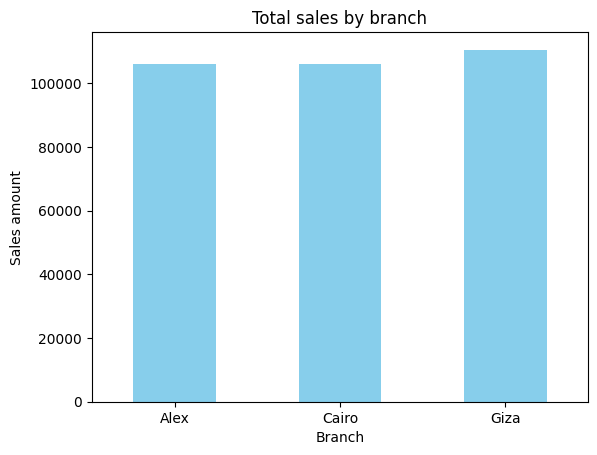

In [49]:
branch_sales = df.groupby('Branch')['Sales'].sum()

branch_sales.plot(kind='bar', color='skyblue')
plt.title('Total sales by branch')
plt.xlabel('Branch')
plt.ylabel('Sales amount')
plt.xticks(rotation=0)
plt.show()

Average rating by product line

C:\Users\ASUS\AppData\Local\Temp\ipykernel_24452\218287672.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  product_rating = df.groupby('Product line')['Rating'].mean()


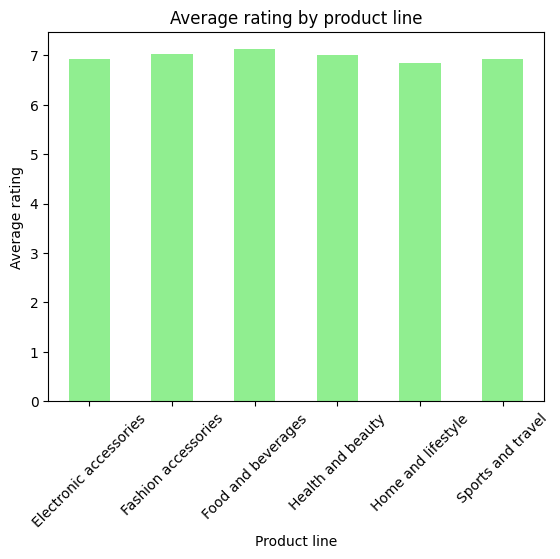

In [48]:
product_rating = df.groupby('Product line')['Rating'].mean()

product_rating.plot(kind='bar', color='lightgreen')
plt.title('Average rating by product line')
plt.xlabel('Product line')
plt.ylabel('Average rating')
plt.xticks(rotation=45)
plt.show()

Sales distribution by customer type

C:\Users\ASUS\AppData\Local\Temp\ipykernel_24452\2116055270.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  customer_sales = df.groupby('Customer type')['Sales'].sum()


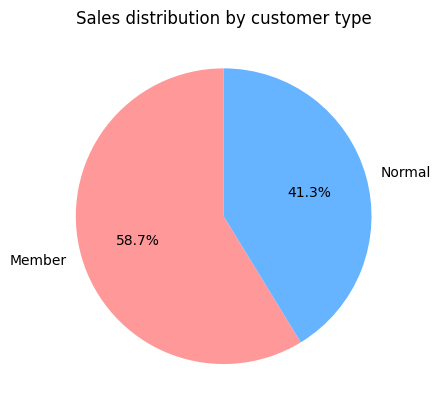

In [47]:
customer_sales = df.groupby('Customer type')['Sales'].sum()

customer_sales.plot(kind='pie', autopct='%1.1f%%', startangle=90, colors=['#ff9999','#66b3ff'])
plt.title('Sales distribution by customer type')
plt.ylabel('')
plt.show()

Total sales by gender

C:\Users\ASUS\AppData\Local\Temp\ipykernel_24452\3026124666.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  gender_sales = df.groupby('Gender')['Sales'].sum()


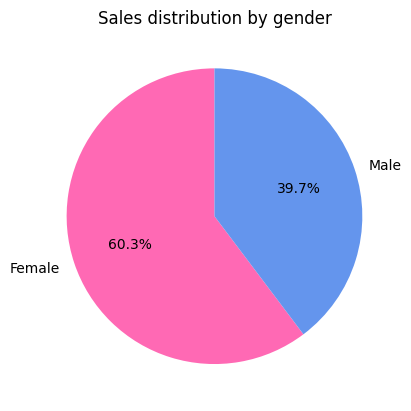

In [46]:
gender_sales = df.groupby('Gender')['Sales'].sum()

gender_sales.plot(kind='pie', autopct='%1.1f%%', startangle=90, colors=['#FF69B4', '#6495ED'])
plt.title('Sales distribution by gender')
plt.ylabel('')
plt.show()

Sales trend over time

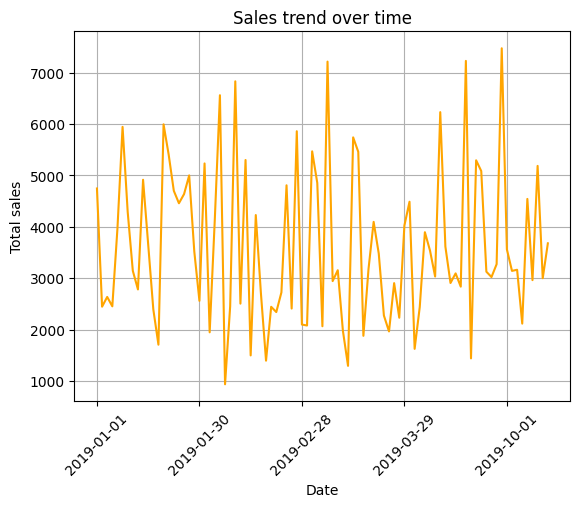

In [45]:
daily_sales = df.groupby('Date')['Sales'].sum().sort_index()


daily_sales.plot(kind='line', color='orange')
plt.title('Sales trend over time')
plt.xlabel('Date')
plt.ylabel('Total sales')
plt.xticks(rotation=45)
plt.grid(True)
plt.show()

Rating in bins with bar chart

In [44]:
bins = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10]


df['Rating_bin'] = pd.cut(df['Rating'], bins=bins)

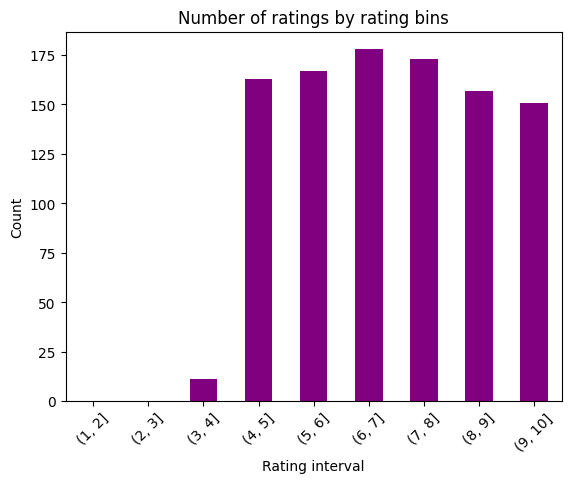

In [43]:
rating_bin_counts = df['Rating_bin'].value_counts().sort_index()


rating_bin_counts.plot(kind='bar', color='purple')
plt.title('Number of ratings by rating bins')
plt.xlabel('Rating interval')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()

Sales vy time of day(morning,afternoon,evening)

In [41]:
def get_time_of_day(time):
    if time >= pd.to_datetime('06:00:00').time() and time < pd.to_datetime('12:00:00').time():
        return 'Morning'
    elif time >= pd.to_datetime('12:00:00').time() and time < pd.to_datetime('18:00:00').time():
        return 'Afternoon'
    else:
        return 'Evening'

#new column add
df['Time_of_day'] = df['Time'].apply(get_time_of_day)

In [42]:
#count sales 
time_counts = df['Time_of_day'].value_counts()

# sum sales 
time_sales = df.groupby('Time_of_day')['Sales'].sum()

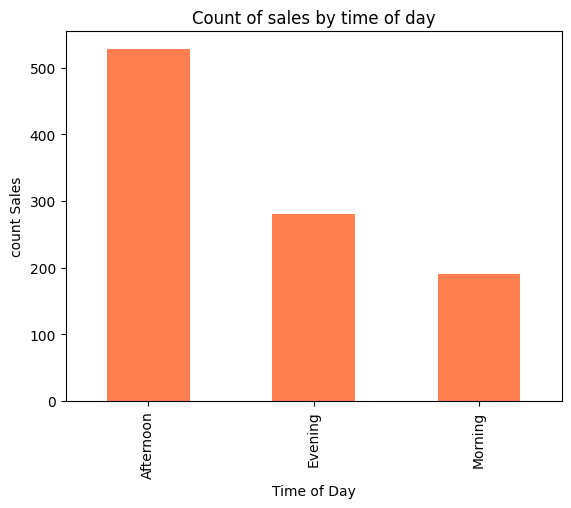

In [38]:
time_counts.plot(kind='bar', color='coral')
plt.title('Count of sales by time of day')
plt.xlabel('Time of Day')
plt.ylabel('count Sales')
plt.show()

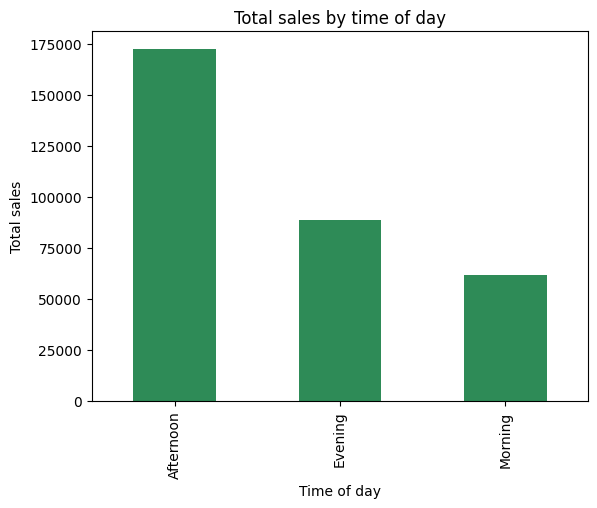

In [39]:
time_sales.plot(kind='bar', color='seagreen')
plt.title('Total sales by time of day')
plt.xlabel('Time of day')
plt.ylabel('Total sales')
plt.show()

Total sales by city

C:\Users\ASUS\AppData\Local\Temp\ipykernel_24452\4133340081.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  city_sales = df.groupby('City')['Sales'].sum()


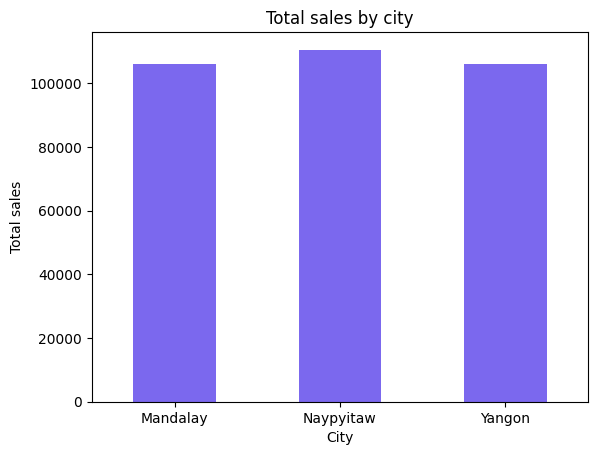

In [50]:
city_sales = df.groupby('City')['Sales'].sum()
city_sales.plot(kind='bar', color='mediumslateblue')
plt.title('Total sales by city')
plt.xlabel('City')
plt.ylabel('Total sales')
plt.xticks(rotation=0)
plt.show()

Profit analysis by product

C:\Users\ASUS\AppData\Local\Temp\ipykernel_24452\2501667931.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  product_profit = df.groupby('Product line')['gross income'].sum().sort_values(ascending=False)


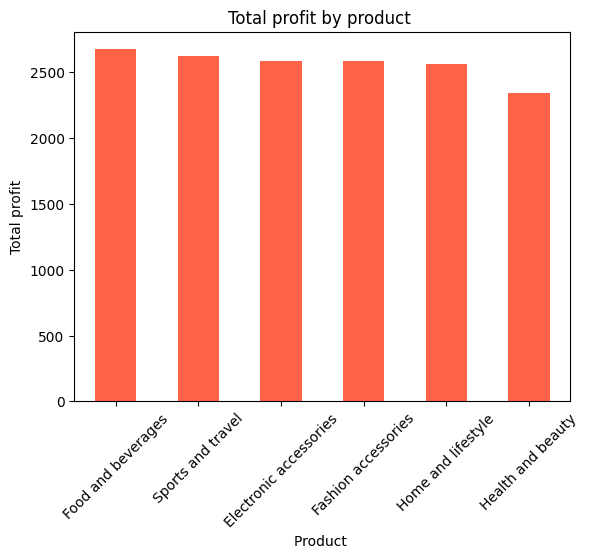

In [51]:
product_profit = df.groupby('Product line')['gross income'].sum().sort_values(ascending=False)

product_profit.plot(kind='bar', color='tomato')
plt.title('Total profit by product ')
plt.xlabel('Product ')
plt.ylabel('Total profit')
plt.xticks(rotation=45)
plt.show()

Most sales product

C:\Users\ASUS\AppData\Local\Temp\ipykernel_24452\1003190261.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  product_quantity = df.groupby('Product line')['Quantity'].sum().sort_values(ascending=False)


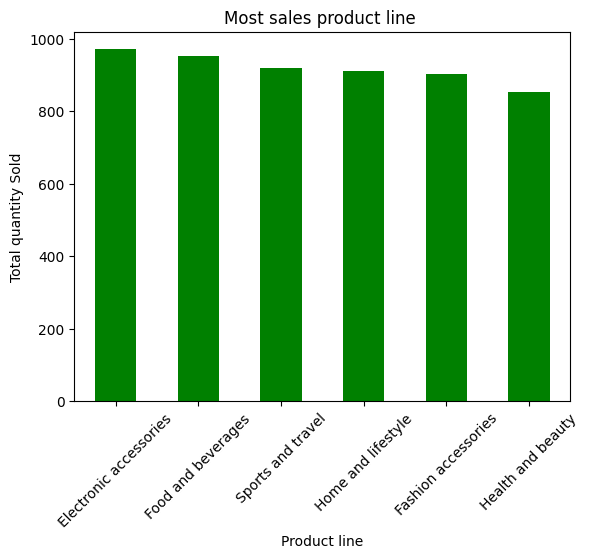

In [53]:
product_quantity = df.groupby('Product line')['Quantity'].sum().sort_values(ascending=False)

product_quantity.plot(kind='bar', color='green')
plt.title('Most sales product line ')
plt.xlabel('Product line')
plt.ylabel('Total quantity Sold')
plt.xticks(rotation=45)
plt.show()